In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

/home/nour/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('data.csv')

# EDA and preprocessing

## Inspecting the data.

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


## pdays column has an unsual value, we need to investigate it.

In [4]:
df[df['pdays'] == 999]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


## 31724 out of 32950 of the records have a value of 999 for pdays, so we can just drop that column.

In [5]:
df.drop(['pdays'], axis=1, inplace=True)

## Inspecting data types.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  previous     32950 non-null  int64 
 13  poutcome     32950 non-null  object
 14  y            32950 non-null  object
dtypes: int64(4), object(11)
memory usage: 3.8+ MB


## We need to convert those columns with object data type to numeric data type but encoded since they are catergorical variables.

In [7]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
numerical_columns = [col for col in df.columns if df[col].dtype == 'int64']

encoding_names = {}  
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = preprocessing.LabelEncoder() 
        df[col]= label_encoder.fit_transform(df[col])
        encoding_names[col] = {i:label for i, label in enumerate(label_encoder.classes_)}


In [8]:
# Return a copy of the dataframe with the encoded column
def decode_colm(colm_name):
    temp = df.copy()
    temp[colm_name] = temp[colm_name].apply(lambda x: encoding_names[colm_name][x])
    return temp

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          32950 non-null  int64
 1   job          32950 non-null  int64
 2   marital      32950 non-null  int64
 3   education    32950 non-null  int64
 4   default      32950 non-null  int64
 5   housing      32950 non-null  int64
 6   loan         32950 non-null  int64
 7   contact      32950 non-null  int64
 8   month        32950 non-null  int64
 9   day_of_week  32950 non-null  int64
 10  duration     32950 non-null  int64
 11  campaign     32950 non-null  int64
 12  previous     32950 non-null  int64
 13  poutcome     32950 non-null  int64
 14  y            32950 non-null  int64
dtypes: int64(15)
memory usage: 3.8 MB


## Checking correlation between variables.

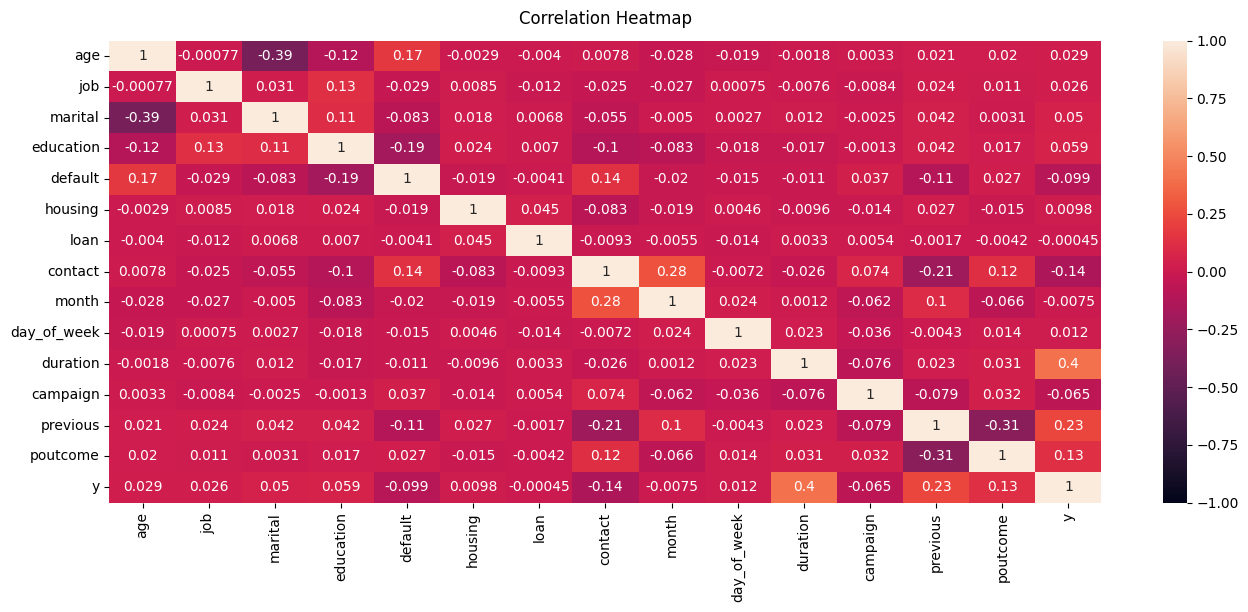

In [10]:
df = pd.DataFrame(df,columns=df.columns)
plt.figure(figsize=(16, 6))
heatmap= sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

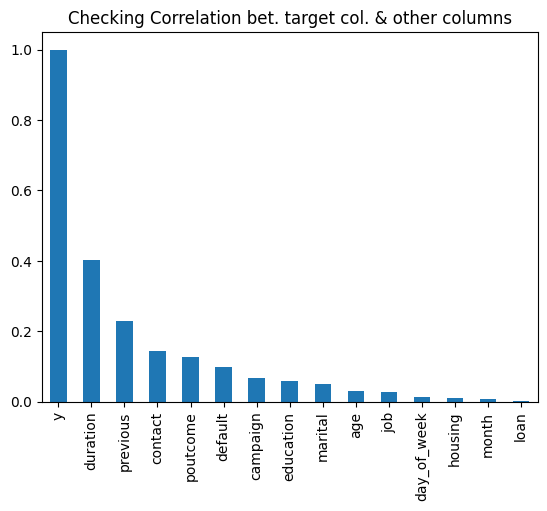

In [11]:
df.corr()["y"].abs().sort_values(ascending=False).plot(kind="bar",
title="Checking Correlation bet. target col. & other columns")
plt.show()

In [12]:
df.corr()["y"].abs().sort_values(ascending=False)

y              1.000000
duration       0.400752
previous       0.229759
contact        0.143238
poutcome       0.127784
default        0.099142
campaign       0.065462
education      0.059263
marital        0.050084
age            0.028673
job            0.026278
day_of_week    0.011926
housing        0.009821
month          0.007508
loan           0.000452
Name: y, dtype: float64

## housing, month, and loan have very low correlation with the target variable, so we can drop them.

In [13]:
df.drop(['loan',  'month', 'housing'], axis=1, inplace=True)
categorical_columns.remove('loan')
categorical_columns.remove('month')
categorical_columns.remove('housing')

## Inspecting data distribution.

In [14]:
df.describe()

,age,job,marital,education,default,contact,day_of_week,duration,campaign,previous,poutcome,y
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,3.723369,1.173354,3.748832,0.210804,0.365463,2.000546,258.127466,2.560607,0.174719,0.929469,0.112656
std,10.403636,3.593935,0.608542,2.136978,0.408109,0.481567,1.400260,258.975917,2.752326,0.499025,0.364187,0.316176
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,103.000000,1.000000,0.000000,1.000000,0.000000
50%,38.000000,2.000000,1.000000,3.000000,0.000000,0.000000,2.000000,180.000000,2.000000,0.000000,1.000000,0.000000
75%,47.000000,7.000000,2.000000,6.000000,0.000000,1.000000,3.000000,319.000000,3.000000,0.000000,1.000000,0.000000
max,98.000000,11.000000,3.000000,7.000000,2.000000,1.000000,4.000000,4918.000000,56.000000,7.000000,2.000000,1.000000


<AxesSubplot: title={'center': 'Mean of each column'}>

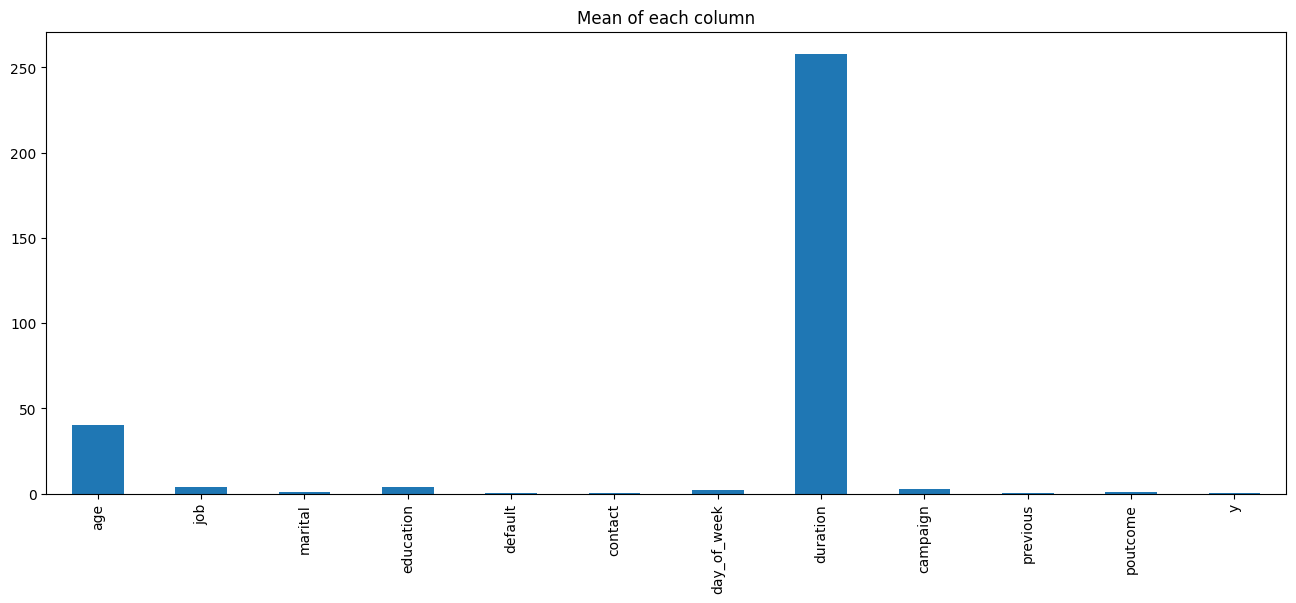

In [15]:
# Plot the mean of each column
df.mean().plot(kind='bar', figsize=(16, 6),title='Mean of each column')

## We need to normalize all numerical variables.

In [16]:
# Normalize in numerical columns list with min-max normalization
normalized_df = df.copy()
for col in numerical_columns:
    normalized_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

<AxesSubplot: title={'center': 'Mean after normalization'}>

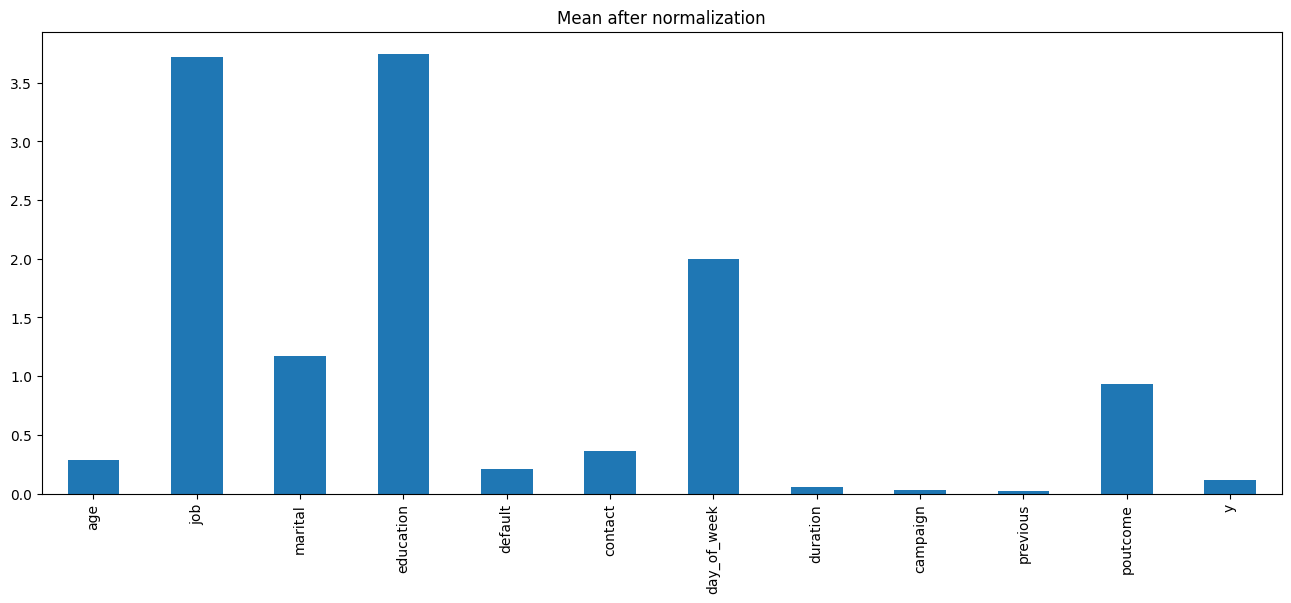

In [17]:
normalized_df.mean().plot(kind='bar', figsize=(16, 6),title='Mean after normalization')

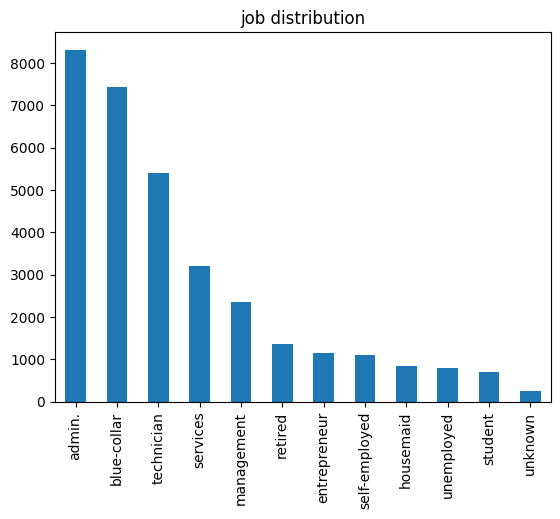

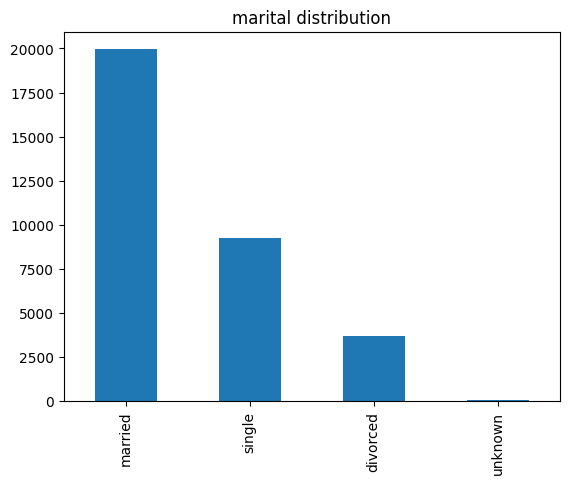

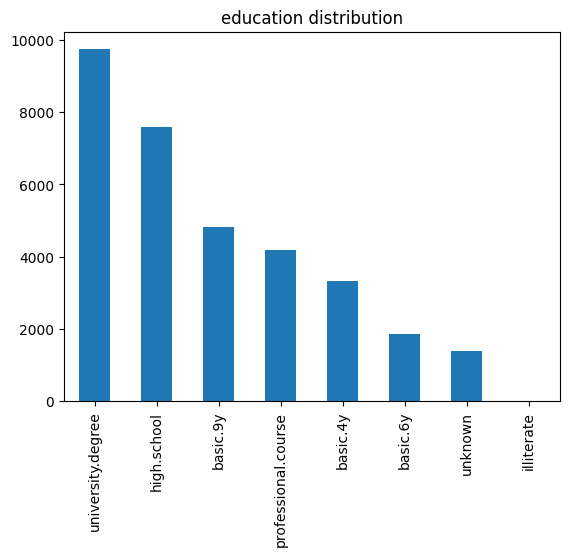

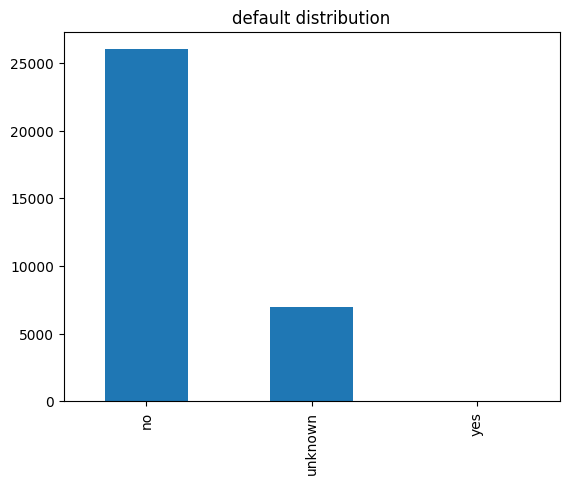

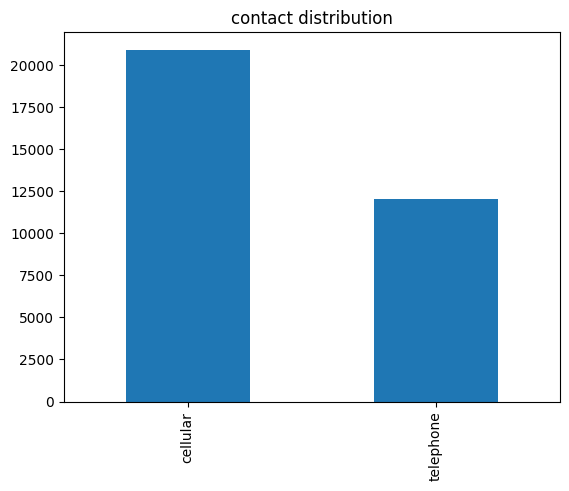

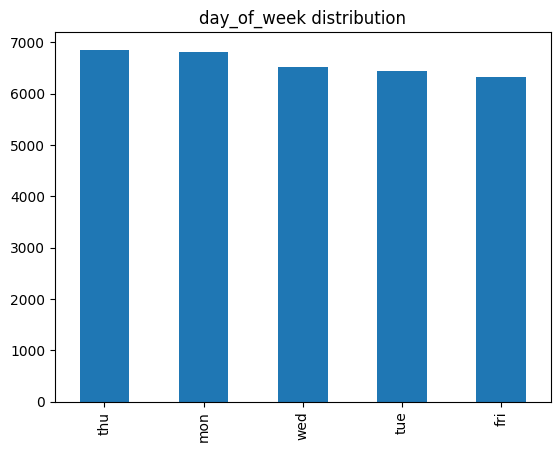

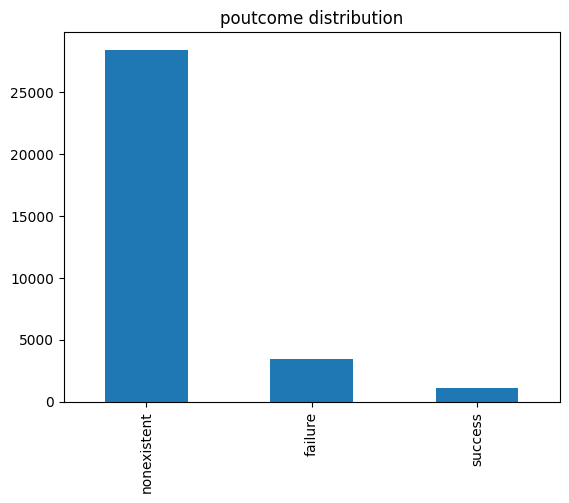

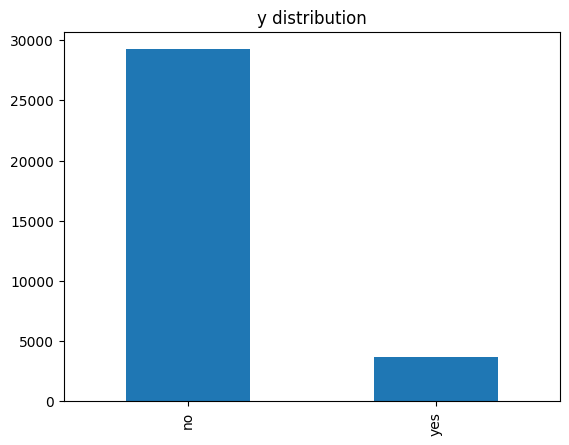

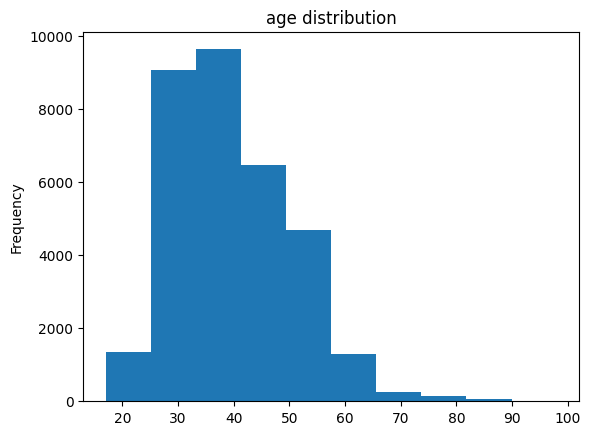

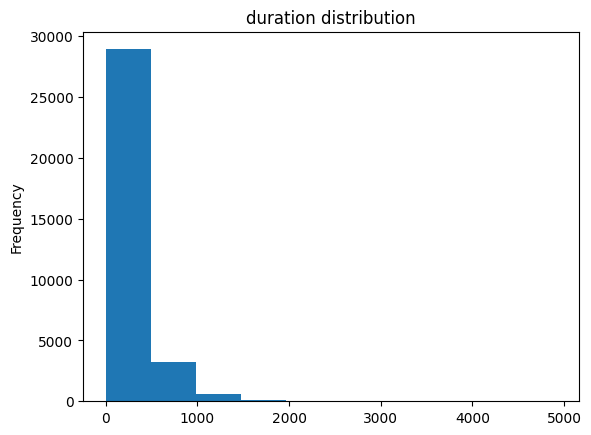

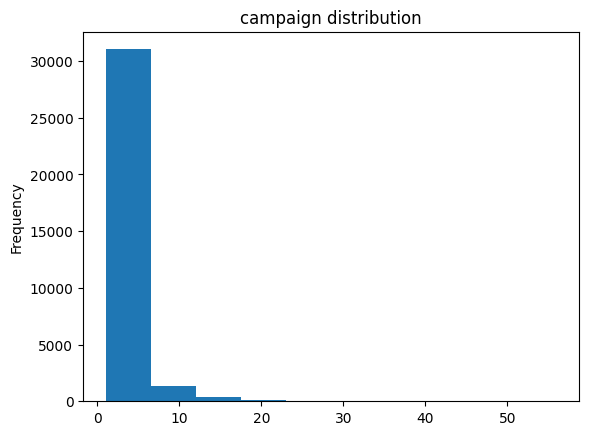

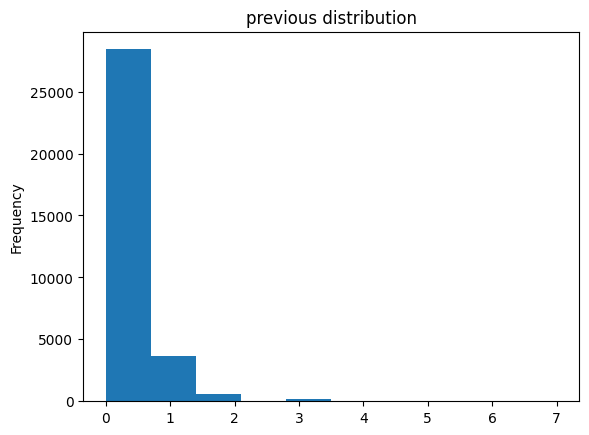

In [18]:
# Plot bar chart for each categorical column and histogram for each numerical column
for col in categorical_columns:
    plt.figure()
    df[col].apply(lambda x: encoding_names[col][x]).value_counts().plot(
        kind="bar", title=col + " distribution"
    )

for col in numerical_columns:
    plt.figure()
    df[col].plot(kind="hist", title=col + " distribution")

Text(0.5, 1.0, 'y v/s Target\n')

<Figure size 640x480 with 0 Axes>

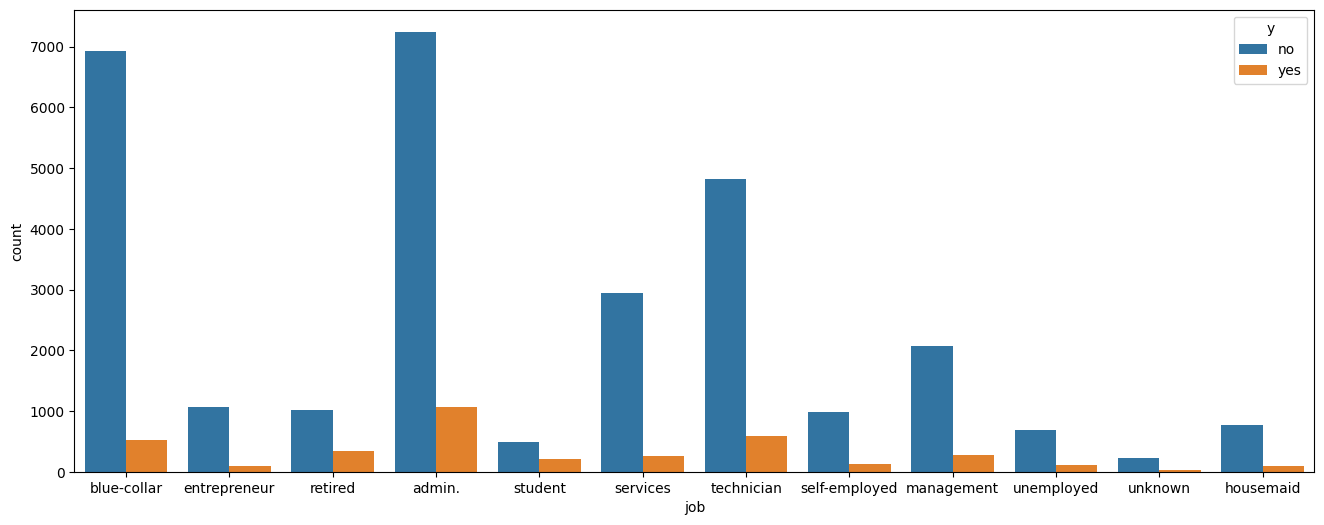

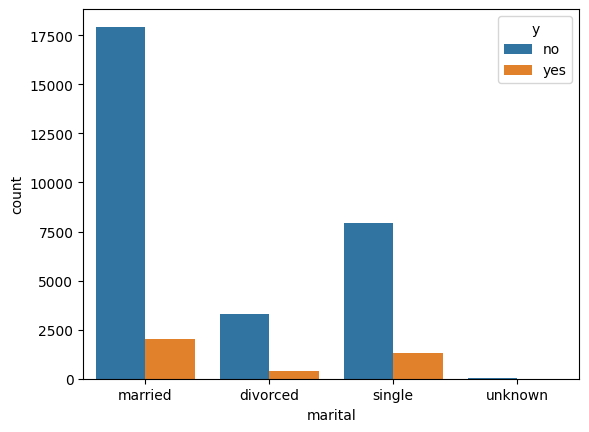

<Figure size 640x480 with 0 Axes>

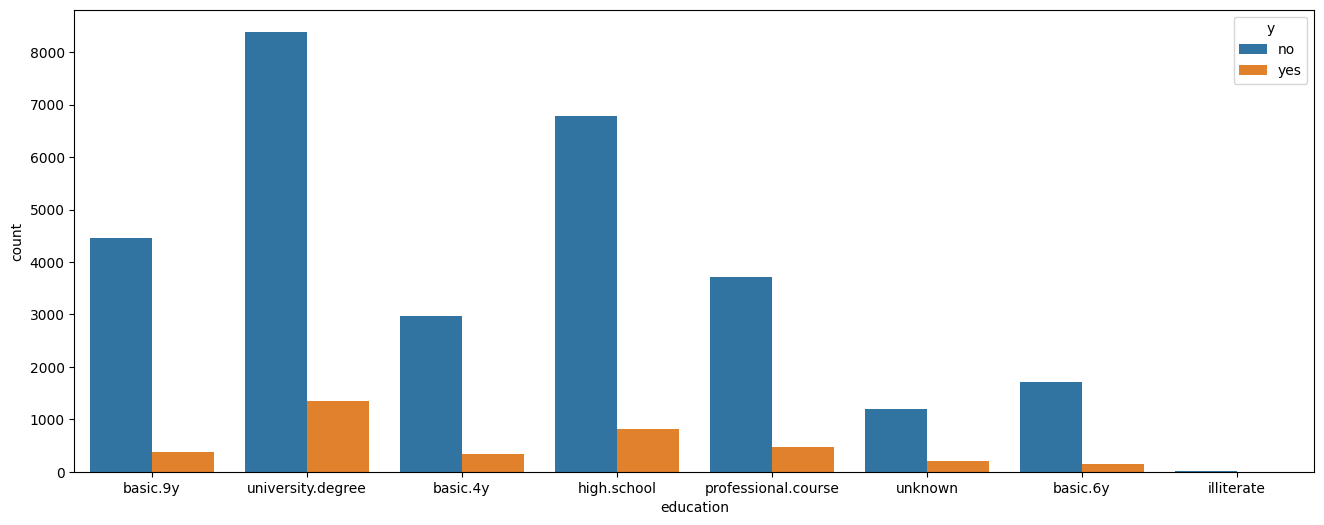

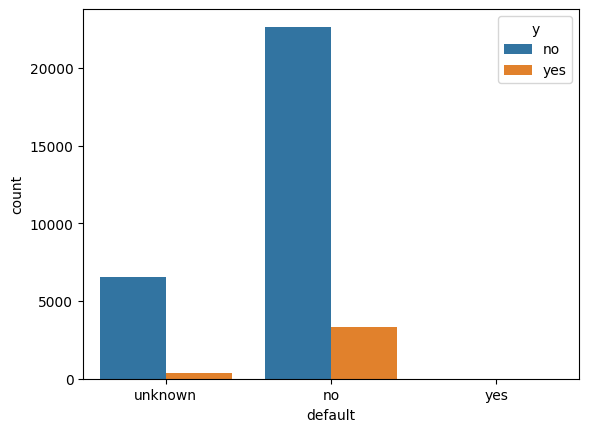

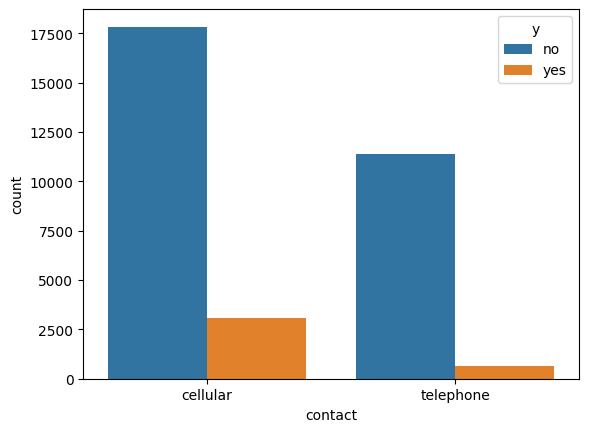

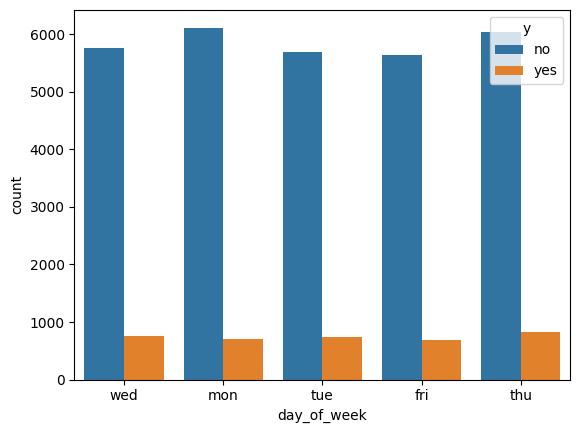

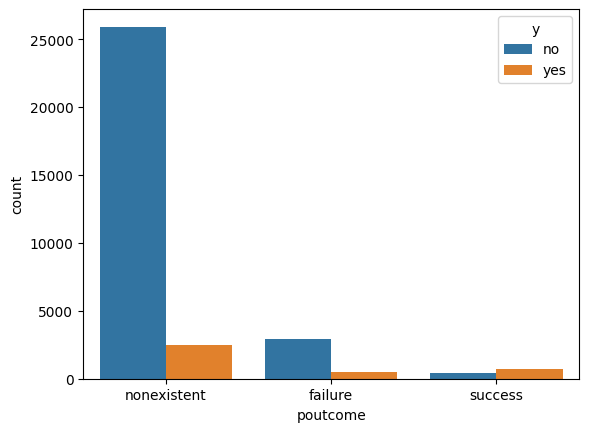

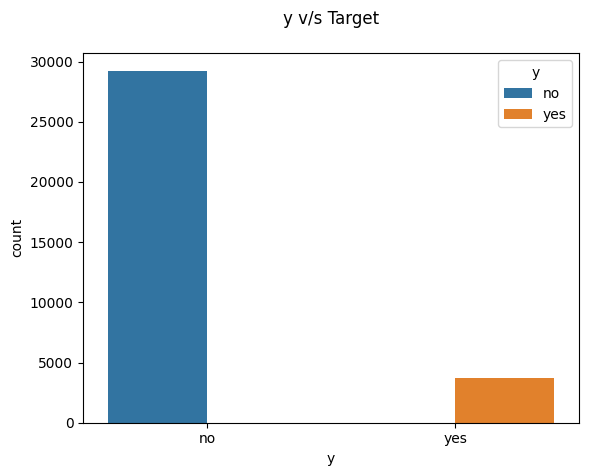

In [19]:
for col in categorical_columns:
    plt.figure()
    if df[col].unique().size > 5:
        plt.figure(figsize=(16, 6))
    sns.countplot(data=decode_colm(col), x=col, hue=decode_colm("y")["y"])
plt.title(col + " v/s Target\n")

# Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold


Accuracy: 90.01%
Recall: 98.38%
Specificity: 27.11%


/home/nour/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


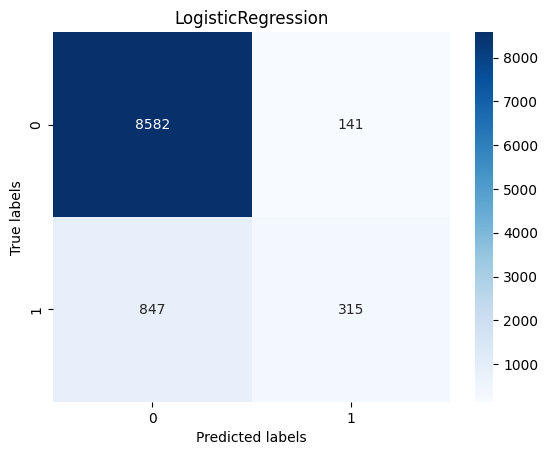

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    normalized_df.drop("y", axis=1),
    normalized_df["y"],
    test_size=0.30,
    random_state=42,
)
y_names = encoding_names["y"]
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
cm = confusion_matrix(y_test, predictions)
recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print("Recall: %.2f%%" % (recall * 100.0))
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Specificity: %.2f%%" % (specificity * 100.0))
sns.heatmap(
    cm,
    annot=True,
    cmap="Blues",
    xticklabels=list(y_names),
    yticklabels=list(y_names),
    fmt="d",
)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title(type(model).__name__)
plt.show()

LogisticRegression
Accuracy: 82.98%
Recall: 83.94%
Specificity: 75.82%


/home/nour/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


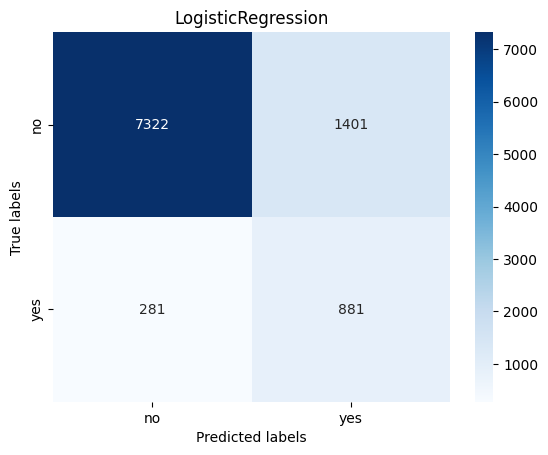






DecisionTreeClassifier
Accuracy: 86.41%
Recall: 92.86%
Specificity: 38.04%


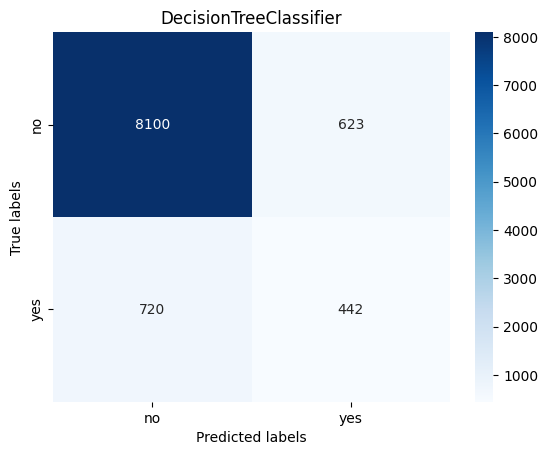






RandomForestClassifier
Accuracy: 89.90%
Recall: 97.51%
Specificity: 32.79%


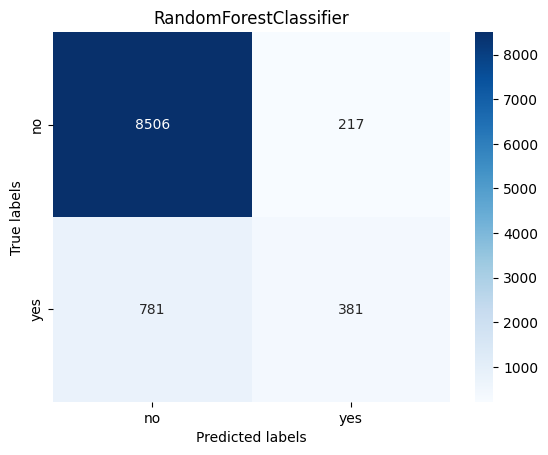






KNeighborsClassifier
Accuracy: 88.23%
Recall: 96.63%
Specificity: 25.22%


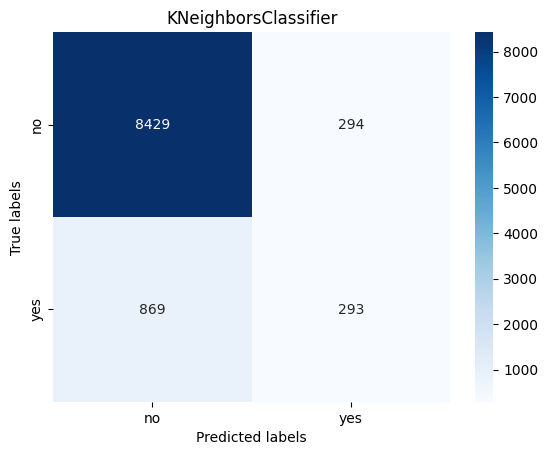






SVC
Accuracy: 78.26%
Recall: 78.37%
Specificity: 77.45%


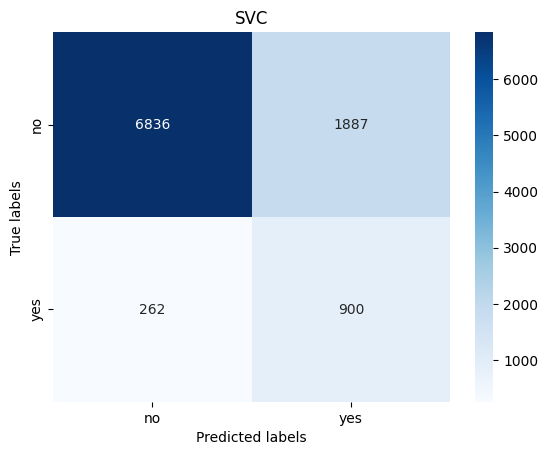






GaussianNB
Accuracy: 84.30%
Recall: 88.44%
Specificity: 53.18%


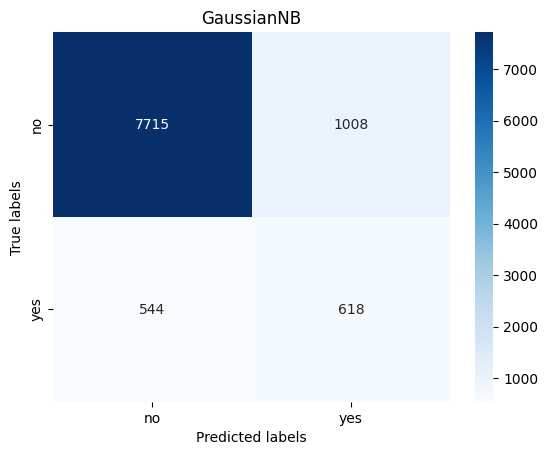






MLPClassifier
Accuracy: 90.27%
Recall: 97.73%
Specificity: 34.25%


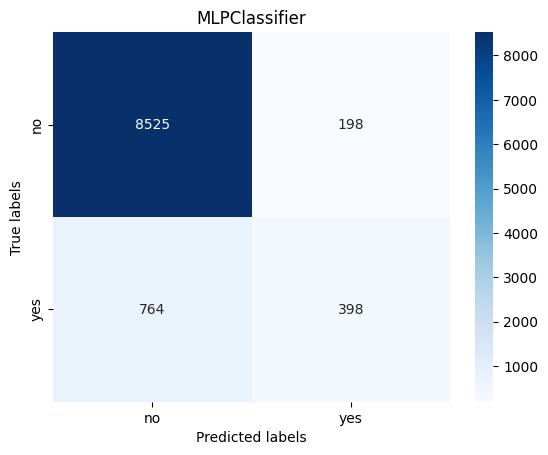

In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    normalized_df.drop("y", axis=1),
    normalized_df["y"],
    test_size=0.30,
    random_state=42,
)

models = [
    LogisticRegression(class_weight="balanced"),
    DecisionTreeClassifier(class_weight="balanced"),
    RandomForestClassifier(n_estimators=100,class_weight="balanced"),
    KNeighborsClassifier(n_neighbors=3),
    SVC(class_weight="balanced"),
    GaussianNB(),
    MLPClassifier(),
]

y_names = list(encoding_names["y"].values())

all_accuracies = {}
all_recalls = {}
all_specificities = {}

all_metrics = [
    ("Accuracy", all_accuracies),
    ("Recall", all_recalls),
    ("Specificity", all_specificities),
]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(type(model).__name__)
    accuracy = accuracy_score(y_test, predictions)
    all_accuracies[type(model).__name__] = accuracy
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    cm = confusion_matrix(y_test, predictions)
    recall = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    all_recalls[type(model).__name__] = recall
    print("Recall: %.2f%%" % (recall * 100.0))
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    all_specificities[type(model).__name__] = specificity
    print("Specificity: %.2f%%" % (specificity * 100.0))
    sns.heatmap(
        cm,
        annot=True,
        cmap="Blues",
        xticklabels=list(y_names),
        yticklabels=list(y_names),
        fmt="d",
    )
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(type(model).__name__)
    plt.show()
    print("\n\n\n\n")

In [23]:
for name, metric in all_metrics:
    print(name.capitalize() + ":")
    for key, value in sorted(metric.items(), key=lambda item: item[1], reverse=True):
        print(key, ": ", value)
    print("\n\n")

Accuracy:
MLPClassifier :  0.9026808295397066
RandomForestClassifier :  0.8990389479008599
KNeighborsClassifier :  0.8823469903894791
DecisionTreeClassifier :  0.8641375821952453
GaussianNB :  0.8429944360141629
LogisticRegression :  0.8298431967627719
SVC :  0.7825998988366212



Recall:
MLPClassifier :  0.9773013871374527
RandomForestClassifier :  0.9751232374183194
KNeighborsClassifier :  0.9662959990828843
DecisionTreeClassifier :  0.9285796171042072
GaussianNB :  0.884443425427032
LogisticRegression :  0.8393901180786427
SVC :  0.7836753410523902



Specificity:
SVC :  0.774526678141136
LogisticRegression :  0.7581755593803786
GaussianNB :  0.53184165232358
DecisionTreeClassifier :  0.3803786574870912
MLPClassifier :  0.342512908777969
RandomForestClassifier :  0.3278829604130809
KNeighborsClassifier :  0.2521514629948365





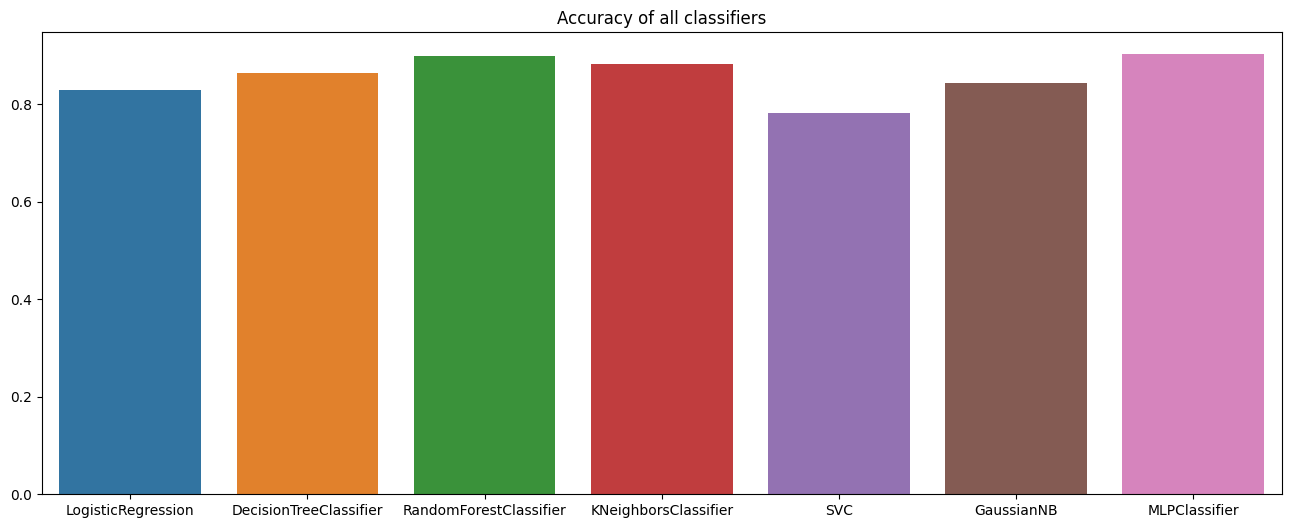

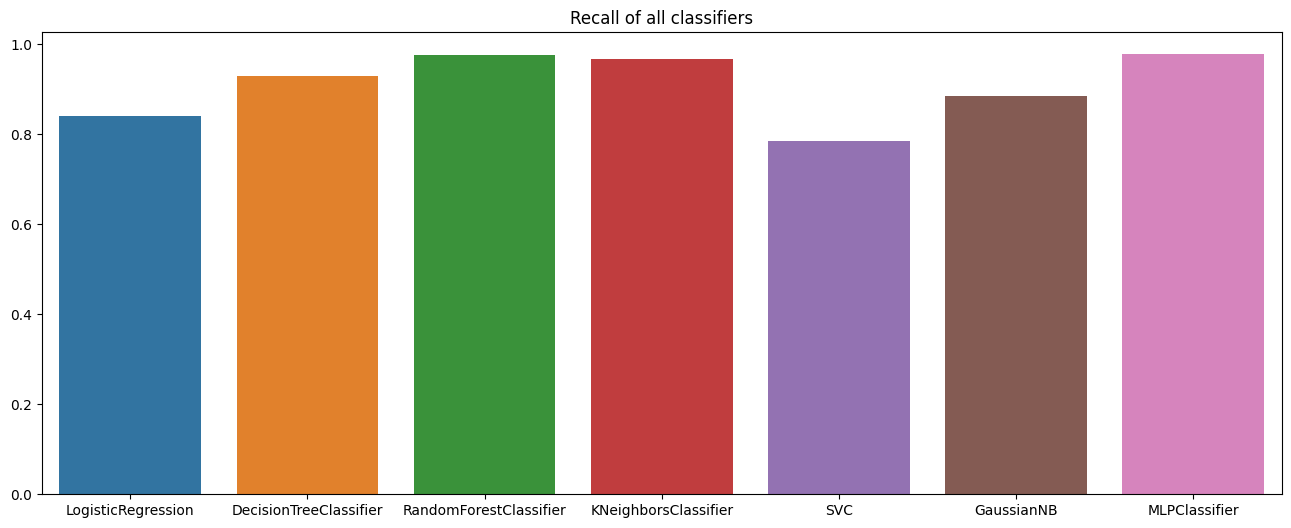

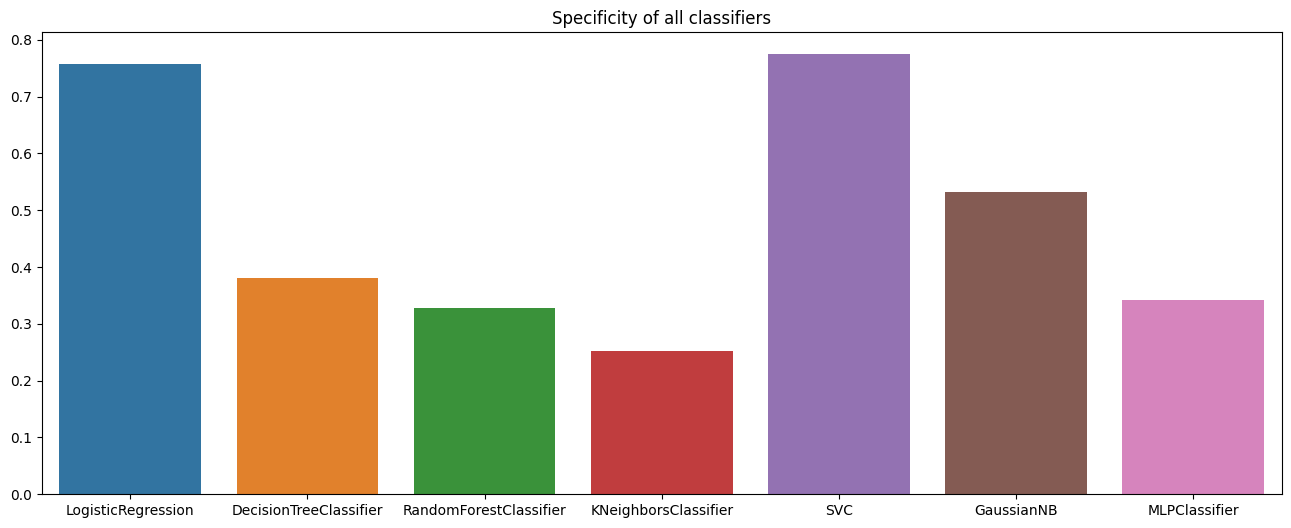

In [24]:
for (name, metric) in all_metrics:
    plt.figure(figsize=(16, 6))
    sns.barplot(x=list(metric.keys()), y=list(metric.values()))
    plt.xticks(range(len(metric)), list(metric.keys()))
    plt.title(name + " of all classifiers")
    plt.show()

/home/nour/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nour/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

LogisticRegression
Accuracy: 0.836236722306525
Recall: 0.8460562047673962
Specificity: 0.7588961484184826
Confusion Matrix:


/home/nour/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


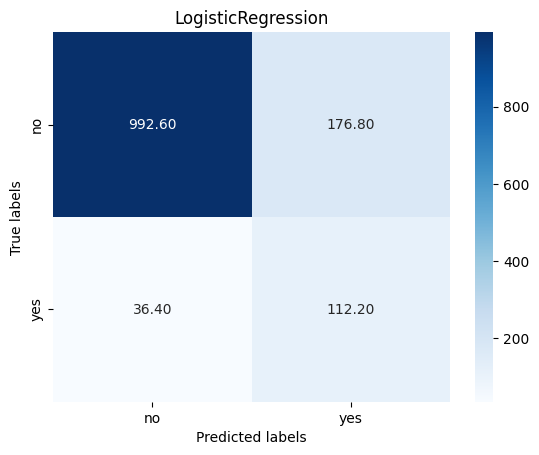






DecisionTreeClassifier
Accuracy: 0.8643095599393019
Recall: 0.924516156051357
Specificity: 0.390088263142429
Confusion Matrix:


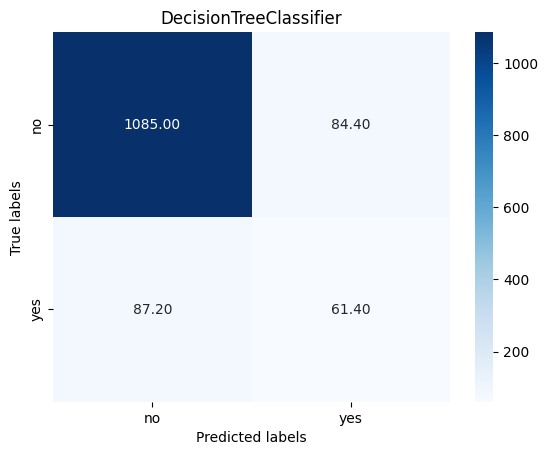






RandomForestClassifier
Accuracy: 0.900546282245827
Recall: 0.9727066237856963
Specificity: 0.33216725375744144
Confusion Matrix:


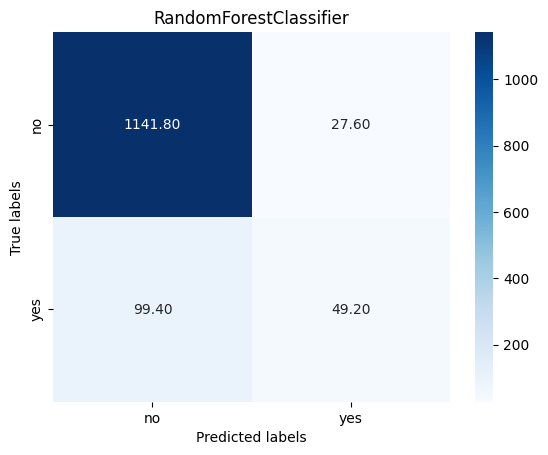






KNeighborsClassifier
Accuracy: 0.885887708649469
Recall: 0.9668922725580741
Specificity: 0.2478478376799817
Confusion Matrix:


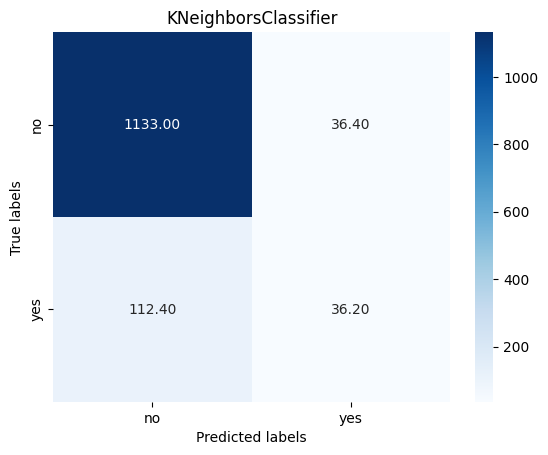






SVC
Accuracy: 0.8054021244309559
Recall: 0.8123672749971516
Specificity: 0.7505472459940578
Confusion Matrix:


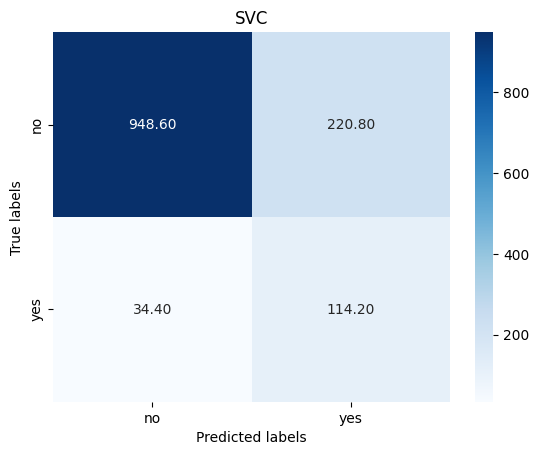






GaussianNB
Accuracy: 0.8461911987860393
Recall: 0.8893562344574615
Specificity: 0.5062038142156988
Confusion Matrix:


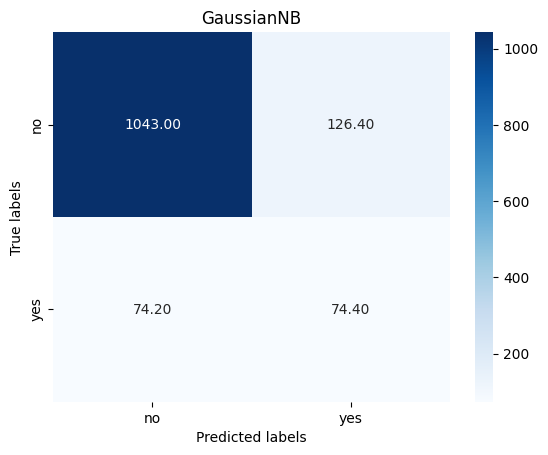

/home/nour/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier
Accuracy: 0.9047344461305007
Recall: 0.9734590002192245
Specificity: 0.3634141474970343
Confusion Matrix:


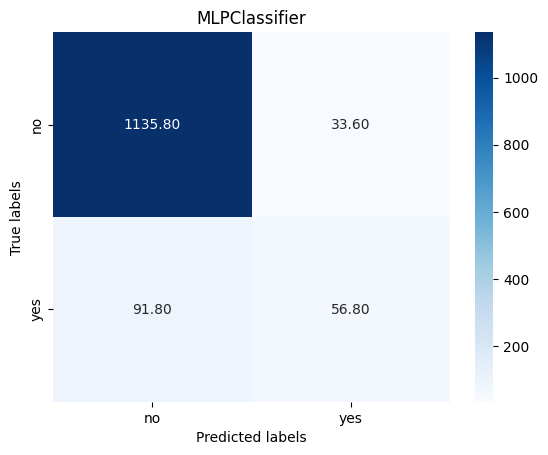

In [25]:
# Train classifiers with stratified cross validation

models = [
    LogisticRegression(class_weight="balanced"),
    DecisionTreeClassifier(class_weight="balanced"),
    RandomForestClassifier(n_estimators=100, class_weight="balanced"),
    KNeighborsClassifier(n_neighbors=3),
    SVC(class_weight="balanced"),
    GaussianNB(),
    MLPClassifier(),
]

y_names = list(encoding_names["y"].values())


k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

all_accuracies = {}
all_recalls = {}
all_specificities = {}

all_metrics = [
    ("Accuracy", all_accuracies),
    ("Recall", all_recalls),
    ("Specificity", all_specificities),
]

for clf in models:
    accuracy = []
    recall = []
    specificity = []
    conf = np.array([[0, 0], [0, 0]])

    for train_index, test_index in skf.split(
        normalized_df.drop("y", axis=1), normalized_df["y"]
    ):
        X_train, X_test = (
            normalized_df.drop("y", axis=1).iloc[train_index],
            normalized_df.drop("y", axis=1).iloc[test_index],
        )
        y_train, y_test = (
            normalized_df["y"].iloc[train_index],
            normalized_df["y"].iloc[test_index],
        )
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy.append(accuracy_score(y_test, predictions))
        conf = confusion_matrix(y_test, predictions)
        recall.append(conf[0, 0] / (conf[0, 0] + conf[0, 1]))
        specificity.append(conf[1, 1] / (conf[1, 0] + conf[1, 1]))

    print(clf.__class__.__name__)
    print("Accuracy:", np.mean(accuracy))
    print("Recall:", np.mean(recall))
    print("Specificity:", np.mean(specificity))
    avg_conf = conf / k
    print("Confusion Matrix:")
    sns.heatmap(
        avg_conf,
        annot=True,
        cmap="Blues",
        xticklabels=list(y_names),
        yticklabels=list(y_names),
        fmt=".2f",
    )
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(clf.__class__.__name__)
    plt.show()
    print("\n\n\n\n")

    all_accuracies[clf.__class__.__name__] = np.mean(accuracy)
    all_recalls[clf.__class__.__name__] = np.mean(recall)
    all_specificities[clf.__class__.__name__] = np.mean(specificity)

In [26]:
for name, metric in all_metrics:
    print(name.capitalize() + ":")
    for key, value in sorted(metric.items(), key=lambda item: item[1], reverse=True):
        print(key, ": ", value)
    print("\n\n")

Accuracy:
MLPClassifier :  0.9047344461305007
RandomForestClassifier :  0.900546282245827
KNeighborsClassifier :  0.885887708649469
DecisionTreeClassifier :  0.8643095599393019
GaussianNB :  0.8461911987860393
LogisticRegression :  0.836236722306525
SVC :  0.8054021244309559



Recall:
MLPClassifier :  0.9734590002192245
RandomForestClassifier :  0.9727066237856963
KNeighborsClassifier :  0.9668922725580741
DecisionTreeClassifier :  0.924516156051357
GaussianNB :  0.8893562344574615
LogisticRegression :  0.8460562047673962
SVC :  0.8123672749971516



Specificity:
LogisticRegression :  0.7588961484184826
SVC :  0.7505472459940578
GaussianNB :  0.5062038142156988
DecisionTreeClassifier :  0.390088263142429
MLPClassifier :  0.3634141474970343
RandomForestClassifier :  0.33216725375744144
KNeighborsClassifier :  0.2478478376799817





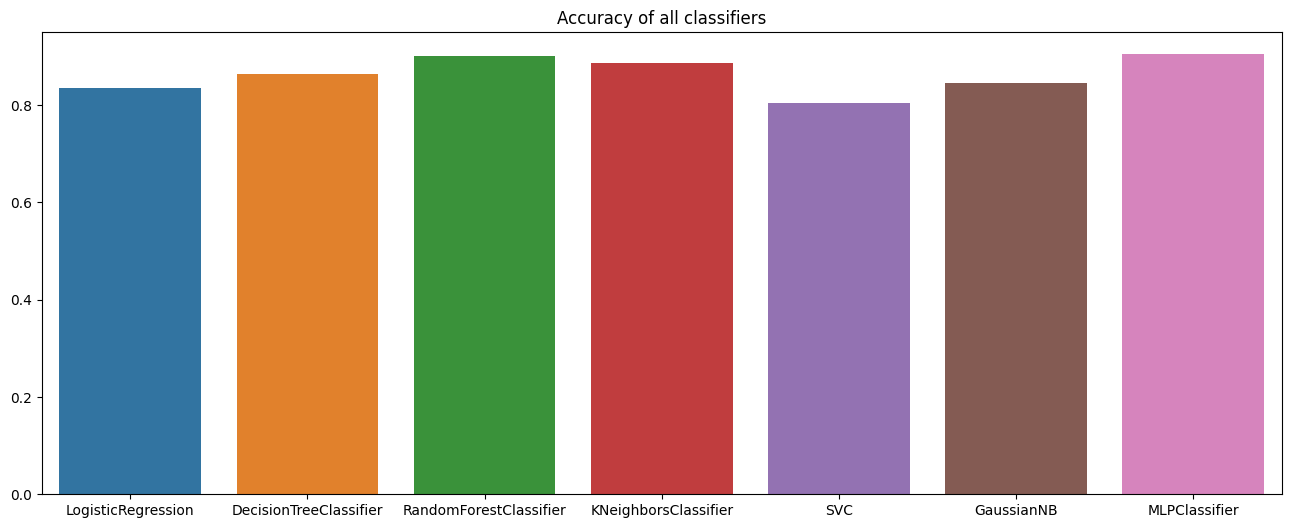

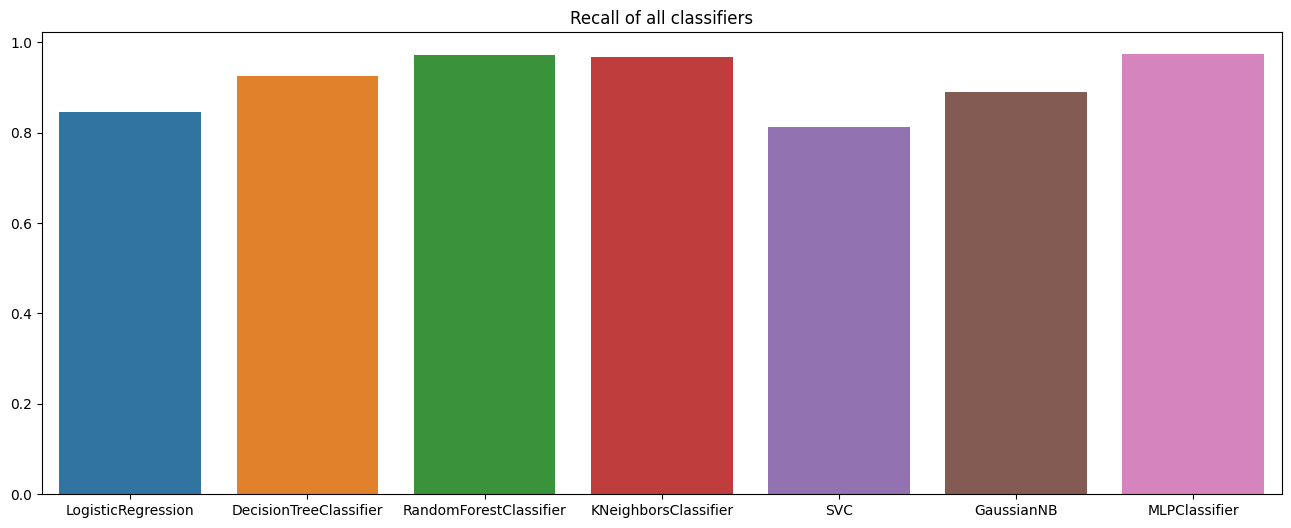

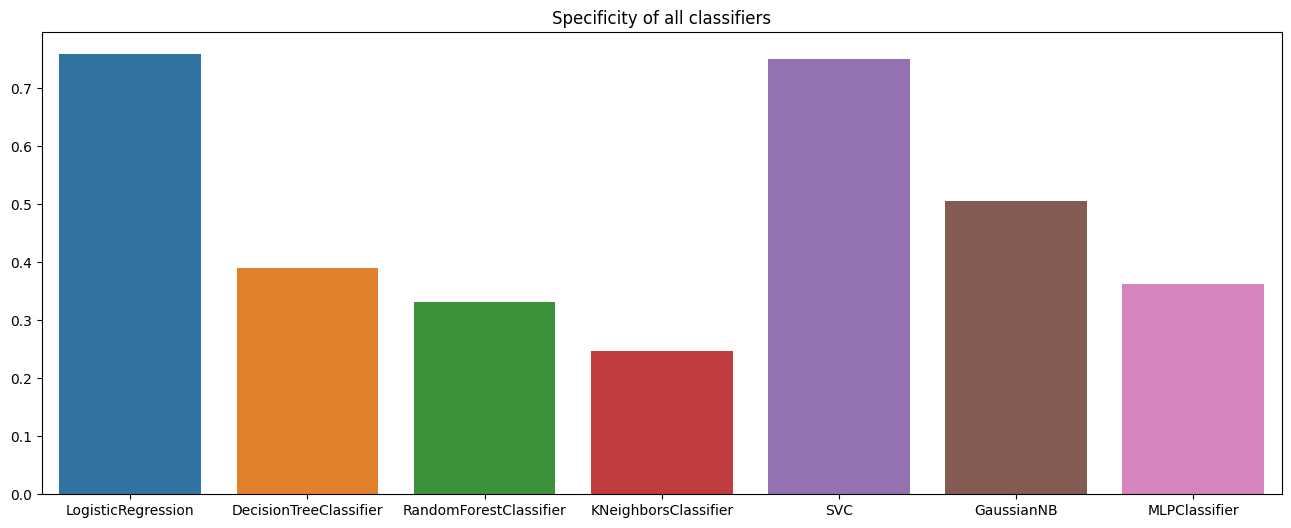

In [27]:
for (name, metric) in all_metrics:
    plt.figure(figsize=(16, 6))
    sns.barplot(x=list(metric.keys()), y=list(metric.values()))
    plt.xticks(range(len(metric)), list(metric.keys()))
    plt.title(name + " of all classifiers")
    plt.show()